In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

### Ingestamos los csv

In [59]:
edx = pd.read_csv('edx_courses.csv')
udemy = pd.read_csv('udemy_courses.csv')

## Análizis exploratorio de datos (EDA) 

### Visualización General

Vemos el tamaño de los dataframes

In [60]:
print(edx.shape)
print(udemy.shape)

(975, 16)
(3678, 12)


Mostramos los primeros 5 valores de los dataframes

In [61]:
edx.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [62]:
udemy.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Caractericas de cada dataframe

In [63]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [64]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


La cantidad de dimensiones de cada columna de los dataframe

In [65]:
edx.dtypes.value_counts()

object    16
dtype: int64

In [66]:
udemy.dtypes.value_counts()

int64      5
object     5
bool       1
float64    1
dtype: int64

### Valores Faltantes

Cantidad de nulos de cada dataframe

In [67]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [68]:
udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Análisis grafico del dataframe que posee nulos

<AxesSubplot: title={'center': 'Columnas de nulos'}, ylabel='Proporción nulos'>

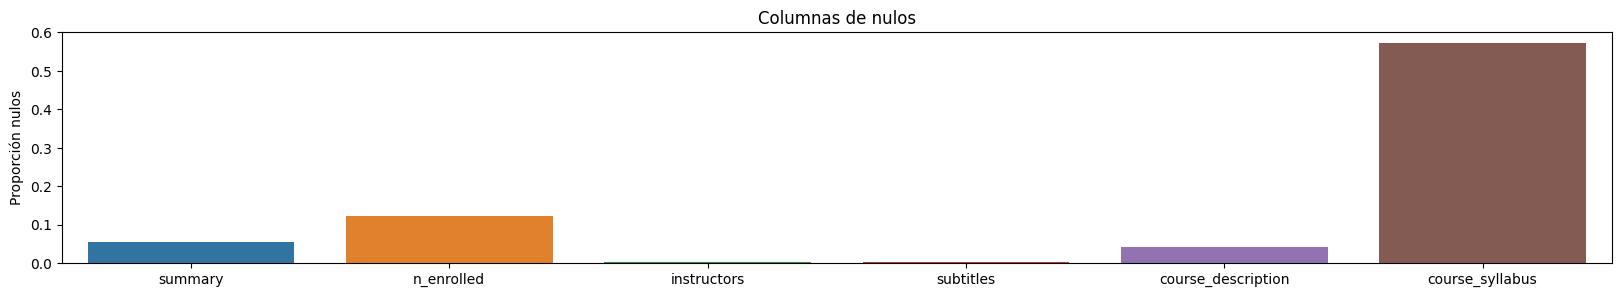

In [69]:
nulos_porcentaje = edx.isnull().sum() / len(edx)
nulos_porcentaje = nulos_porcentaje[nulos_porcentaje > 0]
fig = plt.figure(figsize=(20,3),dpi=100)
plt.title('Columnas de nulos')
plt.ylabel('Proporción nulos')
sns.barplot(x=nulos_porcentaje.index,y=nulos_porcentaje.values)

### Visualización de Duplicados

Cantidad de duplicados de cada dataframe

In [70]:
edx.duplicated().sum()

1

In [71]:
udemy.duplicated().sum()

6

Visualización de los duplicados como dataframes

In [72]:
edx[edx.duplicated()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


In [73]:
udemy[udemy.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


### Valores Atipicos

Antes de continuar se hará una transformación necesaria al dataframe de edx para continuar con el EDA

In [74]:
# Para trabajar el dataframe de edx se necesita extraer números de las cadenas de la columna de 'price'
def only_number(dataframe):
    ''''La función permite transformar la cadena de string a un float, dicha cadena
    incluia el precio del curso, unicamente con este dataframe'''
    lista = []
    for i in range(0,len(dataframe)):
        x = dataframe.iloc[i,12]
        number = x[37:-4]
        number = float(number)
        lista.append(number)
    dataframe.drop(['price'], inplace = True, axis = 1)
    dataframe.insert(12, "price_num", lista)
    return dataframe.head(1)

only_number(edx)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price_num,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online


Variables numericas - edx

In [75]:
edx.describe()

,price_num
count,975.000000
mean,100.465497
std,69.572175
min,5.000000
25%,49.000000
50%,79.000000
75%,149.000000
max,450.000000


Price - edx

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


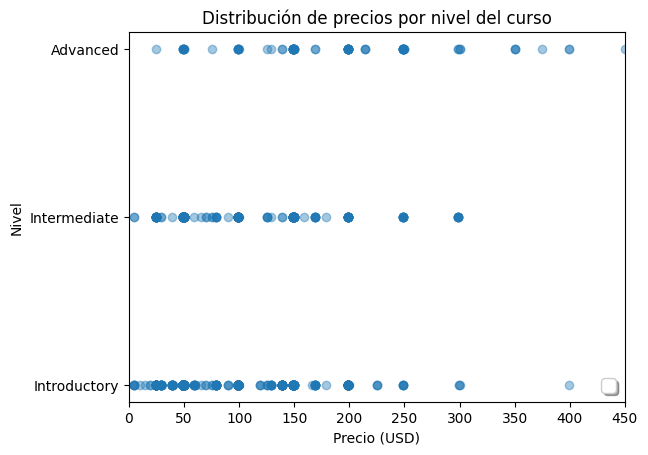

In [76]:
#Con este grafico explica la distribución de precio según nivel de los cursos
x= edx['price_num'].values
y= edx['Level'].values

ax = plt.axes()
ax.scatter(x, y,alpha = 0.4)
ax.set(xlabel='Precio (USD)', ylabel='Nivel',title='Distribución de precios por nivel del curso', xlim = (0,450))
ax.legend(loc='lower right', shadow=True, fontsize=13)

[Text(0.5, 0, 'Precio (USD)'),
 Text(0, 0.5, 'Temas'),
 Text(0.5, 1.0, 'Distribución de precios por tema del curso'),
 (0.0, 450.0)]

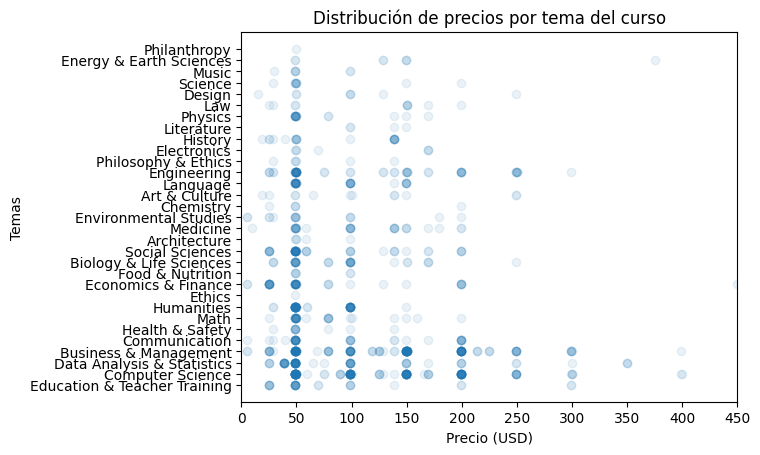

In [77]:


#Con este grafico explica la distribución de precio según temas de los cursos
x= edx['price_num'].values
y= edx['subject'].values

ax = plt.axes()
ax.scatter(x, y,alpha = 0.09)
ax.set(xlabel='Precio (USD)', ylabel='Temas',title='Distribución de precios por tema del curso', xlim = (0,450))

Variables numericas - udemy

In [78]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


Price - udemy

[Text(0.5, 0, 'Precio (USD)'),
 Text(0, 0.5, 'Nivel'),
 Text(0.5, 1.0, 'Distribución de precios por nivel del curso'),
 (0.0, 200.0)]

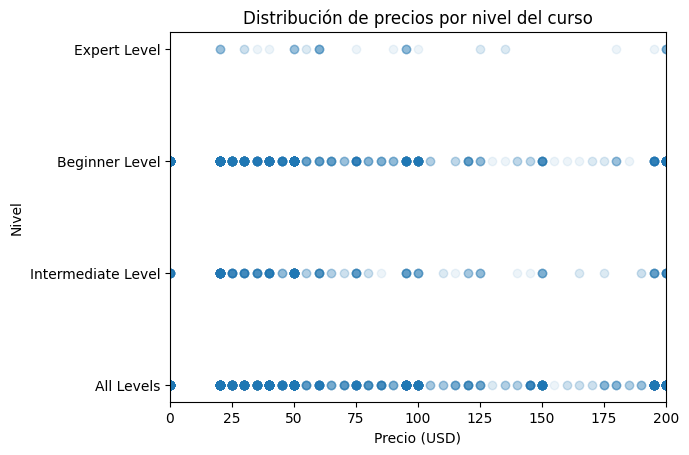

In [79]:
#Con este grafico explica la distribución de precio según nivel de los cursos
x= udemy['price'].values
y= udemy['level'].values

ax = plt.axes()
ax.scatter(x, y,alpha = 0.08)
ax.set(xlabel='Precio (USD)', ylabel='Nivel',title='Distribución de precios por nivel del curso', xlim = (0,200))

[Text(0.5, 0, 'Precio (USD)'),
 Text(0, 0.5, 'Temas'),
 Text(0.5, 1.0, 'Distribución de precios por tema del curso'),
 (0.0, 200.0)]

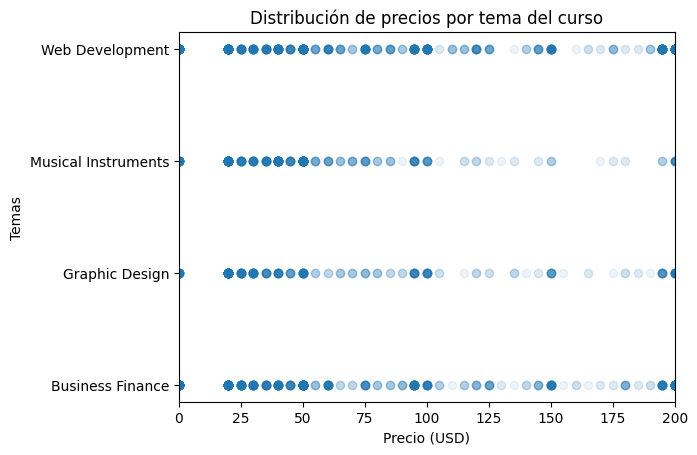

In [80]:
#Con este grafico explica la distribución de precio según temas de los cursos
x= udemy['price'].values
y= udemy['subject'].values

ax = plt.axes()
ax.scatter(x, y,alpha = 0.08)
ax.set(xlabel='Precio (USD)', ylabel='Temas',title='Distribución de precios por tema del curso', xlim = (0,200))

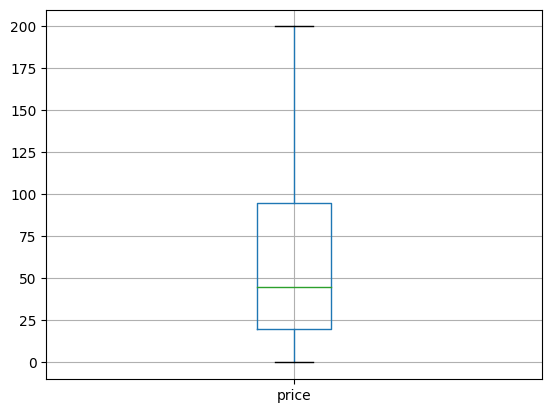

In [81]:
boxplot = udemy.boxplot(column='price')  

Número de subscribtores - udemy

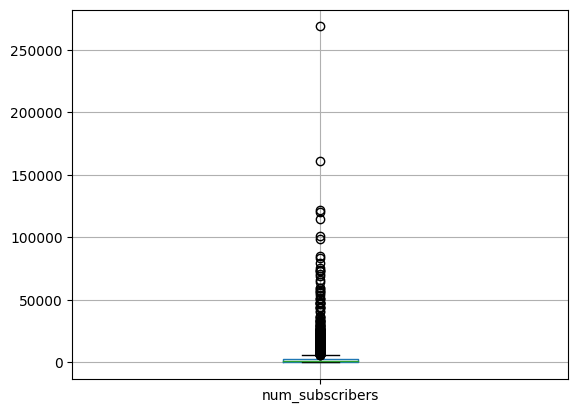

In [82]:
boxplot = udemy.boxplot(column='num_subscribers')  

Duración de cada curso - udemy

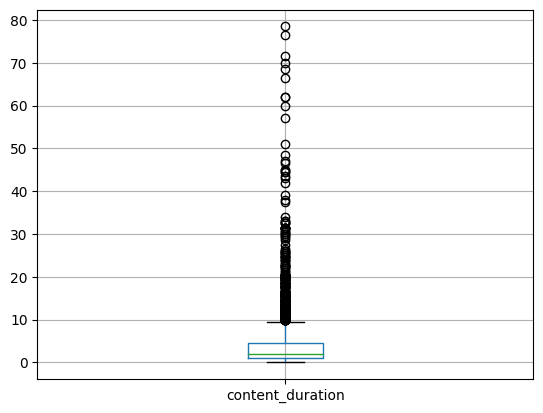

In [83]:

boxplot = udemy.boxplot(column='content_duration')  

### Variables categorias

Instituciones - edx

In [84]:
len(edx['institution'].unique())

111

Idiomas - edx

In [85]:
len(edx['language'].unique())

9

Niveles - edx

In [86]:
len(edx['Level'].unique())

3

Temas - edx

In [87]:
len(edx['subject'].unique())

31

Niveles - udemy

In [88]:
len(udemy['level'].unique())

4

Temas - edx

In [89]:
len(udemy['subject'].unique())

4

### Matrix de correlación

Correlación - Udemy

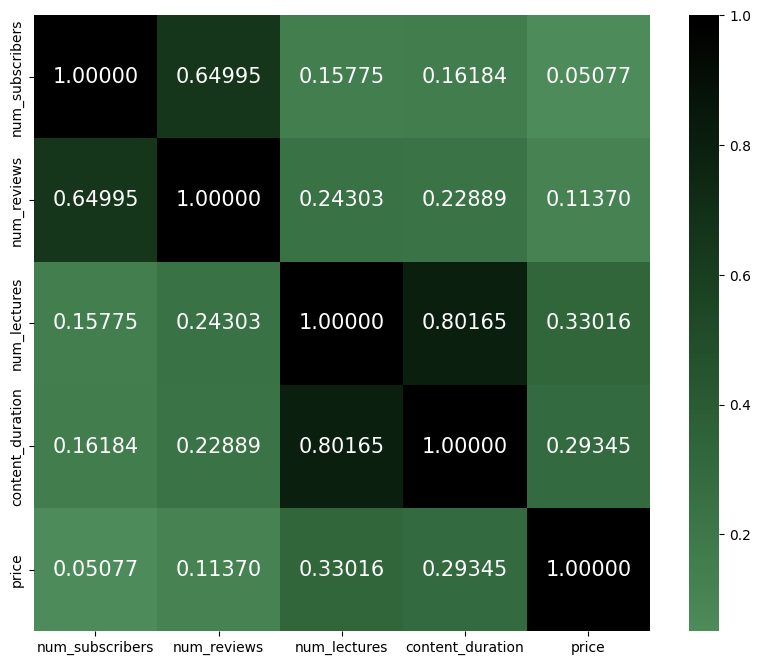

In [90]:
x = udemy[['num_subscribers', 'num_reviews', 'num_lectures','content_duration', 'price']]
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, as_cmap=True)
sns.heatmap(x.corr(), vmax = 1,cmap = cmap, center = 0, annot = True,square = True, fmt='.5f',  annot_kws={'size':15})
plt.show()

## Transformaciones

Depuración de duplicados

In [91]:
edx.drop_duplicates(inplace=True)
udemy.drop_duplicates(inplace=True)

In [92]:
print(edx.shape)
print(udemy.shape)

(974, 16)
(3672, 12)


Depuración de las columnas innecesarias

In [93]:
edx.drop(['summary','course_effort','course_description','course_syllabus','course_url','instructors'], axis=1, inplace = True)

In [94]:
edx.head(1)

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_length,price_num
0,How to Learn Online,"124,980",Self-paced on your time,edX,Introductory,Education & Teacher Training,English,English,2 Weeks,49.0


In [95]:
udemy.drop(['course_id', 'url'], axis=1, inplace = True)

In [96]:
udemy.head(1)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance


Transformación de una columna de str a date

In [97]:
def str_to_date(dataframe):
    lista = []
    for i in range(0,len(dataframe)):
        x = dataframe.iloc[i,8]
        string = x[:10]
        lista.append(string)
    new = pd.Series(lista, name = 'date')
    dataframe['date'] = pd.to_datetime(new)
    insert_column = dataframe.pop('date')
    dataframe.insert(8, 'date', insert_column)
    dataframe.drop(['published_timestamp'], inplace = True, axis = 1)
    return dataframe.head(1)

In [98]:
str_to_date(udemy)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,date,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance


Completar nulos

In [99]:
def str_to_num(dataframe):
    '''La función transforma los numeros que estan en formato str a int, además agrega el promedio en los nulos'''
    lista = []
    new = []
    dataframe['n_enrolled'].fillna('0', inplace=True)
    for i in range(0,len(dataframe)):
        x = dataframe.iloc[i,1]
        string = x.replace(',','')
        number = int(string)
        lista.append(number)
    for i in lista:
        if i == 0:
            new.append(round(sum(lista)/len(lista)))
        else:
            new.append(i)
    dataframe.drop(['n_enrolled'], inplace = True, axis = 1)
    dataframe.insert(1, "num_enrolled", new)
    return dataframe.head(1)

In [100]:
str_to_num(edx)

,title,num_enrolled,course_type,institution,Level,subject,language,subtitles,course_length,price_num
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,English,2 Weeks,49.0


In [101]:
edx[edx['subtitles'].isnull() == True]

,title,num_enrolled,course_type,institution,Level,subject,language,subtitles,course_length,price_num
390,Analytics in Python,82210,Instructor-led on a course schedule,Columbia University,Intermediate,Business & Management,English,NaN,12 Weeks,249.0
516,"Data, Models and Decisions in Business Analytics",36289,Instructor-led on a course schedule,Columbia University,Advanced,Business & Management,English,NaN,12 Weeks,249.0
640,Ecodesign for Cities and Suburbs,28472,Self-paced on your time,University of British Columbia,Introductory,Environmental Studies,English,NaN,6 Weeks,99.0


In [102]:
edx.isnull().sum()

title            0
num_enrolled     0
course_type      0
institution      0
Level            0
subject          0
language         0
subtitles        3
course_length    0
price_num        0
dtype: int64

In [103]:
#Se coloca 'English' en los subtitulos ya que el curso esta dado en inglés
edx['subtitles'].fillna('English', inplace=True)

Exportamos de los csv

In [104]:
edx.to_csv('edx_limpio.csv')
udemy.to_csv('udemy_limpio.csv')

## WordCloud

Creamos un dataframe de títutlos

In [105]:
df_u = udemy['course_title']
df_e = edx['title']
df = pd.DataFrame(df_e.append(df_u, ignore_index = True),columns=['titles'])

C:\Users\franc\AppData\Local\Temp\ipykernel_2580\61900902.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pd.DataFrame(df_e.append(df_u, ignore_index = True),columns=['titles'])


In [106]:
#Se transforma a string
df=df.to_string(header=False, index=False)

In [121]:
#Se crea  el filtro de palabras
stop_words = set(stopwords.words('english') + stopwords.words('spanish') + ["using","Using", "learn", "tough", "Stanford", "Introduction", "First", "Step","Skills", "Essentials", "Crash", "mental", "Play" ,"tools", "master", "Everyone","World","tuning","Networks","Structures","Well","Infraestructure", "Healt","Fundamentals", "Becoming", "Beginners","subjects", "Programming", "Getting", "Started", "help","Powerfull","Everybody", "Aprendiendo" ,"Infraestructure","Platform", "Punctuation","Basic","Basics","Course"])

In [122]:
#Función que genera la nube de palabras con el stopword definido y la guarda en la carpeta para usar en powerbi
def generateWordCloud(data):
    wordcloud = WordCloud(background_color='black',
        stopwords=stop_words,
        max_words=35,
        max_font_size=200, 
        scale=3,
        random_state=3).generate(str(data))
    wordcloud.recolor(random_state=1)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig("wordcloud.jpg")
    plt.show()

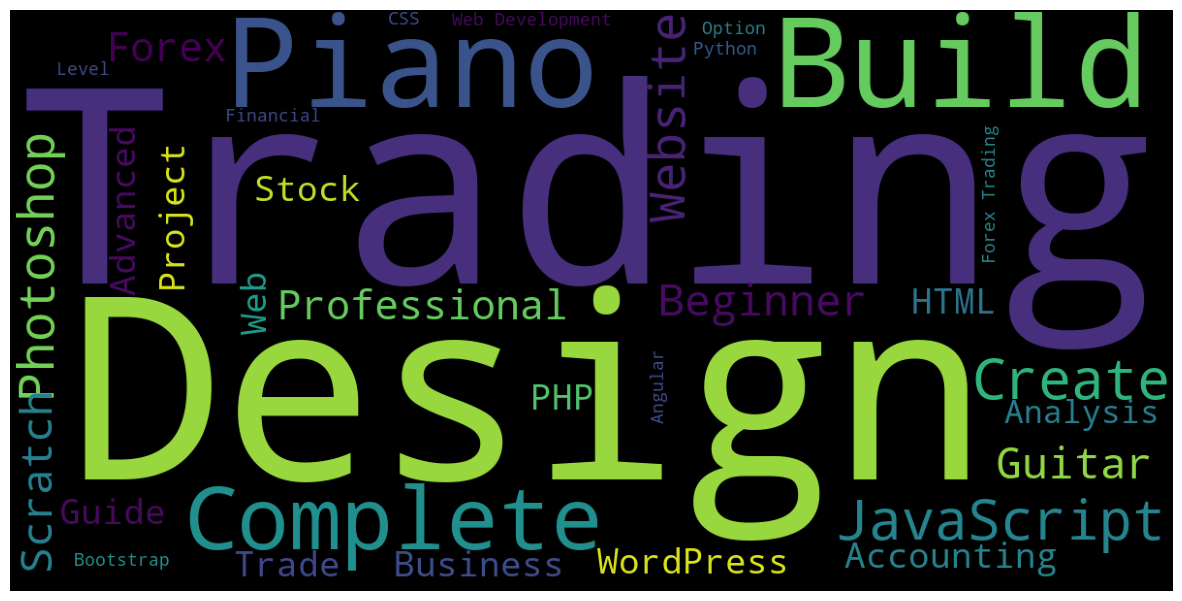

In [123]:
word_cloud = generateWordCloud(df)